# Quantify Builds

In this notebook, the key perfomance indicators that we would like to create greater visbility into and track over time is the percent of builds that passed/failed. This can be used to capture the build success rate ie. number of successful builds / deployments relative to the total number of builds / deployments.

* number and percent of builds passed and failed
* plot of build pass and failure over time

In [13]:
import gzip
import json
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../../..")

module_path_1 = os.path.abspath(os.path.join("../../../data-sources/TestGrid"))
if module_path_1 not in sys.path:
    sys.path.append(module_path_1)

from ipynb.fs.defs.number_of_flakes import (  # noqa: E402
    testgrid_labelwise_encoding,
)  # noqa: E402

In [14]:
# Load test file
with gzip.open("../../../../data/raw/testgrid_163.json.gz", "rb") as read_file:
    testgrid_data = json.load(read_file)

In [15]:
build_failures_list = testgrid_labelwise_encoding(testgrid_data, 12)

In [16]:
len(build_failures_list)

25997262

In [17]:
build_failures_list[0]

(datetime.datetime(2021, 3, 16, 11, 57, 3),
 '"redhat-openshift-informing"',
 'release-openshift-okd-installer-e2e-aws-upgrade',
 'Overall',
 False)

In [18]:
# Convert to dataframe
build_failures_df = pd.DataFrame(
    build_failures_list, columns=["timestamp", "tab", "job", "test", "build_failure"]
)
build_failures_df.head()

,timestamp,tab,job,test,build_failure
0,2021-03-16 11:57:03,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
1,2021-03-16 08:29:07,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True
2,2021-03-16 06:26:45,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True
3,2021-03-16 02:20:29,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True
4,2021-03-15 22:49:37,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True


In [19]:
build_failures_df = build_failures_df.loc[build_failures_df['test'] == "Overall"]

In [20]:
build_failures_df.head()

,timestamp,tab,job,test,build_failure
0,2021-03-16 11:57:03,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
1,2021-03-16 08:29:07,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True
2,2021-03-16 06:26:45,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True
3,2021-03-16 02:20:29,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True
4,2021-03-15 22:49:37,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True


In [21]:
# saving only the first 1000000 out of 19 million rows due to pvc limits.
# 250mb = 1 million --> 4750 mb = 19 million
build_failures_df.head(1000000).to_csv(
    "../../../../data/processed/build_failures.csv",
    header=False,
)

In [22]:
build_passing_list = testgrid_labelwise_encoding(testgrid_data, 1)

In [23]:
# Convert to dataframe
build_passing_df = pd.DataFrame(
    build_passing_list, columns=["timestamp", "tab", "job", "test", "build_passing"]
)
build_passing_df.head()

,timestamp,tab,job,test,build_passing
0,2021-03-16 11:57:03,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
1,2021-03-16 08:29:07,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
2,2021-03-16 06:26:45,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
3,2021-03-16 02:20:29,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
4,2021-03-15 22:49:37,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False


In [24]:
build_passing_df = build_passing_df.loc[build_passing_df['test'] == "Overall"]

In [25]:
build_passing_df.head()

,timestamp,tab,job,test,build_passing
0,2021-03-16 11:57:03,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
1,2021-03-16 08:29:07,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
2,2021-03-16 06:26:45,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
3,2021-03-16 02:20:29,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False
4,2021-03-15 22:49:37,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False


In [26]:
# saving only the first 1000000 out of 19 million rows due to pvc limits.
# 250mb = 1 million --> 4750 mb = 19 million
build_passing_df.head(1000000).to_csv(
    "../../../../data/processed/build_pass.csv",
    header=False,
)

## Number and percent of builds passed and failed

In [28]:
# Metrics
no_tests = build_passing_df.head(1000000).test.count()
print("Total number of tests: %i" % (no_tests))
no_failures = build_failures_df.head(1000000).build_failure.sum()
print("Total number of failing builds: %i" % (no_failures))
build_failures_percentage = (
    (
        build_failures_df.head(1000000).build_failure.sum()
        / build_failures_df.head(1000000).test.count()
    )
) * 100
print("Build failure percentage: %f" % (build_failures_percentage))
no_pass = build_passing_df.head(1000000).build_passing.sum()
print("Total number of passing builds: %i" % (no_pass))
build_pass_percentage = (
    (
        build_passing_df.head(1000000).build_passing.sum()
        / build_passing_df.head(1000000).test.count()
    )
) * 100
print("Build pass percentage: %f" % (build_pass_percentage))

Total number of tests: 37148
Total number of failing builds: 16142
Build failure percentage: 43.453214
Total number of passing builds: 20900
Build pass percentage: 56.261441


## Plot of build pass and failure over time

In [29]:
def plot_builds_tab_grid(tab, job, df):
    
    """
    Takes in input as tab and grid and plots change in 
    build pass/fail over time
    """
    
    df = df[(df["tab"] == tab) | (df["job"] == job)]
    
    sns.set(rc={"figure.figsize": (17, 10)})
    sns.lineplot(x="timestamp", y="build_status", data=df)
    plt.xlabel("Timestamps")
    plt.ylabel("Build Pass or Fail")
    plt.title("Change in Build Pass or Failure over time")
    plt.show()

In [30]:
combined = pd.merge(build_failures_df,build_passing_df,on=['timestamp', 'tab', 'job', 'test'])

In [31]:
combined

,timestamp,tab,job,test,build_failure,build_passing
0,2021-03-16 11:57:03,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False,False
1,2021-03-16 08:29:07,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True,False
2,2021-03-16 06:26:45,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True,False
3,2021-03-16 02:20:29,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True,False
4,2021-03-15 22:49:37,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True,False
...,...,...,...,...,...,...
37229,2021-03-14 00:01:00,"""redhat-assisted-installer""",periodic-ci-openshift-release-master-nightly-4...,Overall,False,True
37230,2021-03-13 00:01:07,"""redhat-assisted-installer""",periodic-ci-openshift-release-master-nightly-4...,Overall,False,True
37231,2021-03-12 04:22:20,"""redhat-assisted-installer""",periodic-ci-openshift-release-master-nightly-4...,Overall,False,True
37232,2021-03-11 00:01:18,"""redhat-assisted-installer""",periodic-ci-openshift-release-master-nightly-4...,Overall,True,False


In [32]:
def label_race (row):
   if row['build_failure']:
      return 'Fail'

   if row['build_passing']:
      return 'Pass'

In [33]:
combined['build_status']=combined.apply (lambda row: label_race(row), axis=1)

In [34]:
combined.head()

,timestamp,tab,job,test,build_failure,build_passing,build_status
0,2021-03-16 11:57:03,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,False,False,None
1,2021-03-16 08:29:07,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True,False,Fail
2,2021-03-16 06:26:45,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True,False,Fail
3,2021-03-16 02:20:29,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True,False,Fail
4,2021-03-15 22:49:37,"""redhat-openshift-informing""",release-openshift-okd-installer-e2e-aws-upgrade,Overall,True,False,Fail


In [35]:
len(combined)

37234

In [36]:
# since we are only interested in success and failure statuses
combined = combined.dropna()

In [37]:
len(combined)

37112

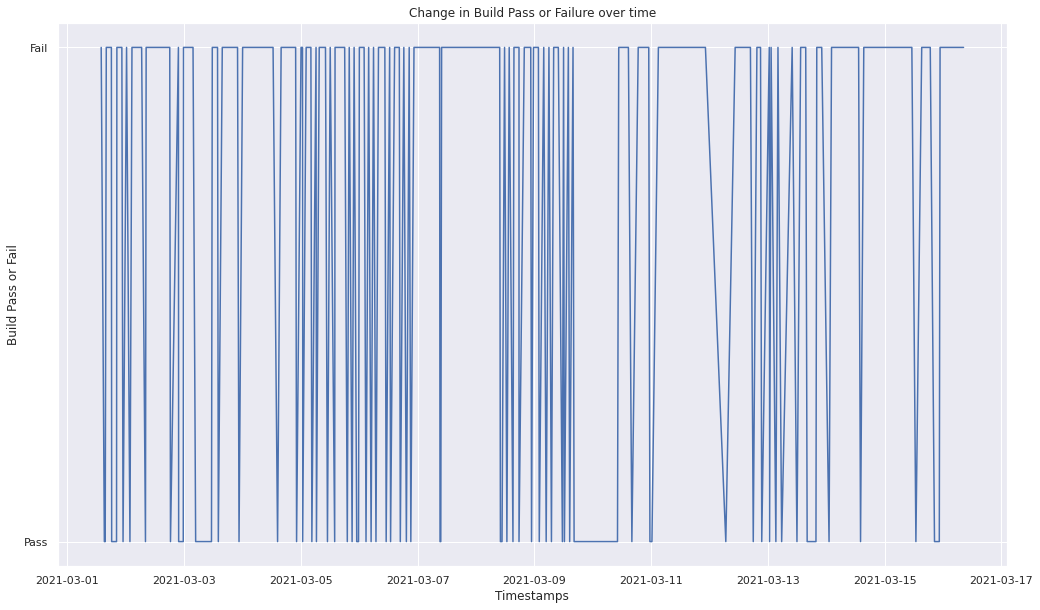

In [38]:
plot_builds_tab_grid("redhat-openshift-informing", "release-openshift-okd-installer-e2e-aws-upgrade", combined)

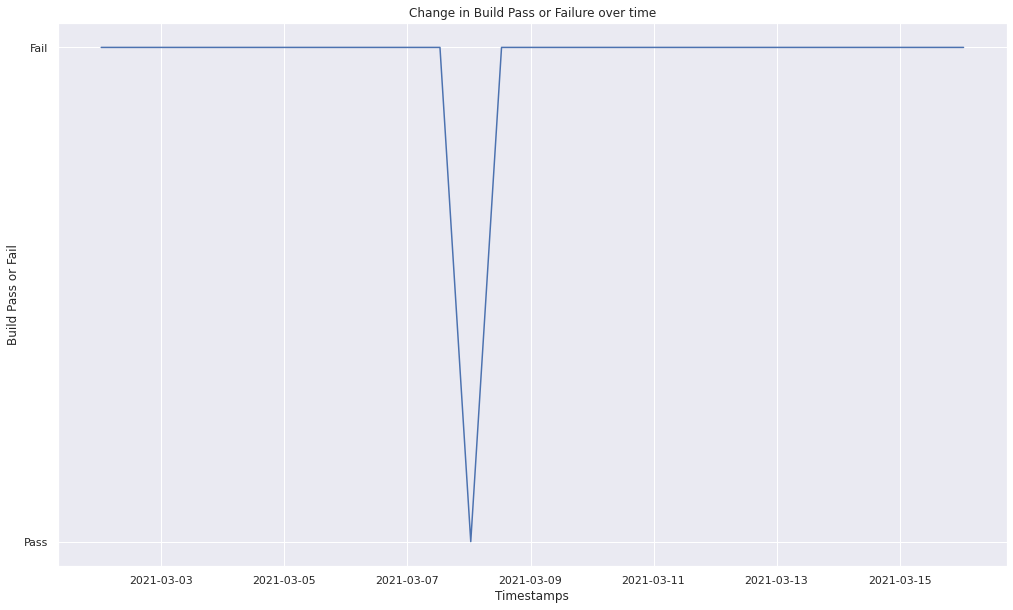

In [39]:
plot_builds_tab_grid("redhat-openshift-ocp-release-4.2-informing", "release-openshift-origin-installer-e2e-aws-upgrade-rollback-4.1-to-4.2", combined)

### Conclusion

In this Notebook, we use the "Overall" as a proxy for a build. Testgrid refers an aggregate of multiple tests performed at a certain timestamp within a Job as a Build and each build has a unique Build ID. In this notebook, we went ahead and used the labels provided by testgrid which classify a test overall as Pass or Fail to indicate build success and failures and thus calculate the percent of success and failures.